In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
pd.options.display.max_columns = 400 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 3000
pd.options.display.max_seq_items = None

In [2]:
base_personas = pd.read_csv('base_enespersonas.csv', sep=';')
base_hogares = pd.read_csv('base_eneshogares.csv', sep= ';')
base_personas.rename(columns = {'nocues':'nocues - NUMERO IDENTIFICADOR DE VIVIENDA', 'nhog':'nhog - NUMERO IDENTIFICADOR DE HOGAR'}, inplace = True)
left = base_hogares
right = base_personas
df = pd.merge(left, right, on= [left.columns[0], left.columns[1]])

In [3]:
base_hogares.shape
base_personas.shape
df.shape

(8267, 226)

(27615, 157)

(27620, 381)

In [4]:
df['f_calib3 - FACTOR DE CALIBRACIÓN'].equals(df['f_calib3'])

False

In [5]:
a = df['f_calib3 - FACTOR DE CALIBRACIÓN'] == df['f_calib3']
type(a)
a = pd.DataFrame(a)
a.loc[a[0] == False]

pandas.core.series.Series

,0
5844,False
5845,False
5846,False
5847,False
5848,False
5849,False
5850,False
5851,False
5852,False
5853,False


In [6]:
df.loc[np.r_[5844:5854, 20900], ['f_calib3 - FACTOR DE CALIBRACIÓN', 'f_calib3']]

,f_calib3 - FACTOR DE CALIBRACIÓN,f_calib3
5844,NaN,NaN
5845,NaN,NaN
5846,NaN,NaN
5847,NaN,NaN
5848,NaN,NaN
5849,NaN,NaN
5850,NaN,NaN
5851,NaN,NaN
5852,NaN,NaN
5853,NaN,NaN


In [7]:
df['f_calib3 - FACTOR DE CALIBRACIÓN'].isna().sum()
df['f_calib3'].isna().sum()

10

10

In [8]:
calib = df['f_calib3 - FACTOR DE CALIBRACIÓN'].unique()
calib.sort()
calib.shape
calib[0:50]
calib[-50:]

(3000,)

array([ 8.,  9., 14., 17., 20., 21., 22., 23., 24., 27., 29., 30., 31.,
       33., 34., 35., 36., 37., 38., 39., 40., 42., 43., 44., 45., 46.,
       47., 48., 49., 54., 55., 56., 58., 59., 60., 61., 62., 63., 65.,
       67., 68., 69., 71., 72., 73., 74., 76., 77., 78., 79.])

array([ 9191.,  9220.,  9273.,  9328.,  9352.,  9461.,  9472.,  9505.,
        9524.,  9538.,  9577.,  9698.,  9769.,  9871.,  9886.,  9888.,
        9907.,  9977., 10133., 10284., 10309., 10449., 10472., 10502.,
       10593., 10666., 10686., 10812., 10963., 11037., 11084., 11436.,
       11699., 12017., 12127., 12501., 12920., 12943., 13499., 13512.,
       13657., 13823., 14786., 15167., 15575., 18086., 18114., 19916.,
       27258.,    nan])

In [9]:
df['Region'].equals(df['region'])
df['aglo - AGLOMERADO'].equals(df['aglo'])
df['t_aglo - TAMAÑO DEL AGLOMERADO'].equals(df['t_aglo'])
df['estrato_U - ESTRATO DE LA UNIDAD PRIMARIA'].equals(df['estrato_U'])
df['cod_U - CODIGO DE LA UNIDAD PRIMARIA'].equals(df['cod_U'])

True

True

True

True

True

In [10]:
df.columns[np.r_[2, 228:233]]

Index(['f_calib3 - FACTOR DE CALIBRACIÓN', 'region', 'aglo', 't_aglo',
       'estrato_U', 'cod_U'],
      dtype='object')

In [11]:
df = df.drop(df.columns[np.r_[2, 228:233, 235]], axis=1)
# también estoy eliminando el mes del cumpleaños

In [12]:
#########################################################################
#########################################################################
########################## Analisis de Hogares ##########################
#########################################################################
#########################################################################

In [13]:
df.columns[7]
df.columns[8]
df[df.columns[7]].unique()
df[df.columns[8]].unique()

'v1 - TIPO DE BARRIO'

'v1esp - TIPO DE BARRIO (OTRO)'

array([ 3.,  2.,  1.,  5.,  4., nan])

array([nan,  2.,  4.,  3.,  1.])

In [14]:
otro_b = [1, 2, 3, 4]
barrio = [5, 6, 7, 8]
for (i, j) in zip(otro_b, barrio):
    df.loc[df[df.columns[8]] == i, df.columns[7]] = j
    # df.loc[df[df.columns[8]]==4]

df = df.drop(df.columns[8], axis= 1)

In [15]:
df[df.columns[7]].unique()
df.columns[8]

array([ 3.,  2.,  1.,  6.,  4., nan,  8.,  7.,  5.])

'v2 - TIPO DE VIVIENDA'

In [16]:
# CREO LA VARIABLE VHOG COMBINANDO 'nocues - NUMERO IDENTIFICADOR DE VIVIENDA' y
# nhog - NUMERO IDENTIFICADOR DE HOGAR'

In [17]:
df.columns[0:2]

Index(['nocues - NUMERO IDENTIFICADOR DE VIVIENDA', 'nhog - NUMERO IDENTIFICADOR DE HOGAR'], dtype='object')

In [18]:
df.iloc[:, 0] = df.iloc[:,0].astype('Int64')
df.iloc[:,1] = df.iloc[:,1].astype('Int64')

In [19]:
df['vhog'] = df[df.columns[0]].map(str) + '.' + df[df.columns[1]].map(str)

In [20]:
df= df.drop(df.columns[0:2], axis=1)

In [21]:
cols = list(df.columns)
cols[0]

'Region'

In [22]:
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df.columns[0]

'vhog'

In [23]:
df[df.columns[np.r_[0, 223,228:230]]]

,vhog,miembro,v112 - CONVIVE CON MADRE,v113 - CONVIVE CON PADRE
0,1.1,1.0,NaN,NaN
1,1.1,2.0,NaN,NaN
2,1.1,3.0,2.0,1.0
3,1.1,4.0,NaN,86.0
4,1.1,5.0,3.0,4.0
...,...,...,...,...
27615,8308.1,3.0,2.0,1.0
27616,8308.1,4.0,2.0,1.0
27617,8308.1,5.0,2.0,1.0
27618,8308.1,6.0,2.0,1.0


In [24]:
value_counts = df.groupby(df.columns[0])[[df.columns[228], df.columns[229]]].agg(
    {i:'value_counts' for i in (df.columns[228],df.columns[229])}).apply(lambda x: np.nansum(x), axis=1  )

In [25]:
value_counts.name = 'hijxs_en_vhog'

In [26]:
df = df.merge(value_counts, how='left', left_on=[df.columns[0], df.columns[223]], right_index= True)

In [27]:
cols = list(df.columns)
# cols

In [28]:
# list(df.columns[0:230])

In [29]:
cols= list(df.columns[0:230]) + list(df.columns[-1:]) + list(df.columns[230:-1])
df = df[cols]
# df.columns

In [30]:
df[df.columns[np.r_[0, 223, 228:231]]][0:20]

,vhog,miembro,v112 - CONVIVE CON MADRE,v113 - CONVIVE CON PADRE,hijxs_en_vhog
0,1.1,1.0,NaN,NaN,1.0
1,1.1,2.0,NaN,NaN,1.0
2,1.1,3.0,2.0,1.0,1.0
3,1.1,4.0,NaN,86.0,1.0
4,1.1,5.0,3.0,4.0,NaN
5,2.1,1.0,3.0,NaN,NaN
6,2.1,2.0,NaN,NaN,1.0
7,2.1,3.0,2.0,NaN,2.0
8,2.1,4.0,3.0,NaN,NaN
9,3.1,1.0,3.0,2.0,1.0


In [31]:
pos_cony = list(range(1,13))
# df['v115 - CONVIVE CON PAREJA'].isin(pos_cony)
pos_cony

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [32]:
df.loc[ ( ( (df['v115 - CONVIVE CON PAREJA'] == 1) | (df['v111 - PARENTESCO PSH'] == 2) )  & ((df['v111 - PARENTESCO PSH'] == 2) | (df['v111 - PARENTESCO PSH'] == 1)) ) |
       ( (df['v115 - CONVIVE CON PAREJA'] == 2) &  (df['v111 - PARENTESCO PSH'] == 1) ) 
       | ( (df['v111 - PARENTESCO PSH'] == 1) & (df['v115 - CONVIVE CON PAREJA'].isin(pos_cony))  )
       ,     'pareja_nuclear'] = 1

df['pareja_nuclear'].fillna(2, inplace=True)

In [33]:
df[df.columns[np.r_[0, 223, 227, 232, -1]]][0:25]

,vhog,miembro,v111 - PARENTESCO PSH,v115 - CONVIVE CON PAREJA,pareja_nuclear
0,1.1,1.0,1.0,2.0,1.0
1,1.1,2.0,2.0,1.0,1.0
2,1.1,3.0,3.0,4.0,2.0
3,1.1,4.0,5.0,3.0,2.0
4,1.1,5.0,7.0,NaN,2.0
5,2.1,1.0,1.0,NaN,2.0
6,2.1,2.0,10.0,NaN,2.0
7,2.1,3.0,9.0,NaN,2.0
8,2.1,4.0,6.0,NaN,2.0
9,3.1,1.0,1.0,NaN,2.0


In [34]:
cols= list(df.columns[:233]) + list(df.columns[-1:]) + list(df.columns[233:-1])
df = df[cols]
# df.columns

In [35]:
df.iloc[:20, 231:233]

,v114 - TIENE PAREJA,v115 - CONVIVE CON PAREJA
0,1.0,2.0
1,1.0,1.0
2,1.0,4.0
3,1.0,3.0
4,NaN,NaN
5,2.0,NaN
6,2.0,NaN
7,2.0,NaN
8,2.0,NaN
9,2.0,NaN


In [36]:
df['v114 - TIENE PAREJA'].count()
print('Dicen tener pareja ' + str( (df['v114 - TIENE PAREJA'] == 1).sum() ) + ' personas')
# df['v115 - CONVIVE CON PAREJA'].count()
print('De las cuales ' + str(df['v115 - CONVIVE CON PAREJA'].count()) + ' personas han informado si conviven o no con ella'  ) 

20876

Dicen tener pareja 11982 personas
De las cuales 10884 personas han informado si conviven o no con ella


In [37]:
# Casos que dicen sí tener pareja pero no contestaron si conviven con esta o no 
filtered = df[df['v114 - TIENE PAREJA'] == 1 & df['v115 - CONVIVE CON PAREJA'].isna()]
filtered = filtered[['v114 - TIENE PAREJA', 'v115 - CONVIVE CON PAREJA']]
filtered.shape
# 10884+1098
filtered[:10]

(1098, 2)

,v114 - TIENE PAREJA,v115 - CONVIVE CON PAREJA
74,1.0,NaN
123,1.0,NaN
149,1.0,NaN
272,1.0,NaN
318,1.0,NaN
322,1.0,NaN
356,1.0,NaN
357,1.0,NaN
368,1.0,NaN
376,1.0,NaN


In [38]:
## TRANSFORMO LA VARIABLE 'FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA' (A-B-C-D-E-F)
## EN 'FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA' (AHORROS, CREDITO, CREDITO, PRESTAMO, PRESTAMO, HERENCIA, OTROS)

In [39]:
df[df.columns[15:21]][:25]

,V10a - FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA,v10b - FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA,v10c - FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA,v10d - FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA,v10e - FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA,v10f - FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA
0,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN
5,1.0,7.0,NaN,NaN,NaN,NaN
6,1.0,7.0,NaN,NaN,NaN,NaN
7,1.0,7.0,NaN,NaN,NaN,NaN
8,1.0,7.0,NaN,NaN,NaN,NaN
9,6.0,NaN,NaN,NaN,NaN,NaN


In [40]:
var = 'FINANCIAMIENTO DE VIVIENDA (COMPRA O CONSTRUCCION)'
ls = (var+ ': AHORROS'), (var + ': CREDITO HIPOTECARIO/BANCARIO'), (var+':CREDITO DE PRESTAMISTA'),(var+ ': PRESTAMO DE FAMILIAR/ AMIGX'), (var+ ': PRESTAMO DE UNX DESCONOCIDX'), (var+ ': HERENCIA'),(var + ': OTROS')
subset = df[df.columns[15:21]]

In [41]:
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix=['','','','','',''])
b = a.groupby(a.columns[:], axis= 1).sum()
b.columns = ls

In [42]:
df[b.columns[:]] = b[b.columns[:]]
df = df.drop(df[df.columns[15:21]], axis = 1)

In [43]:
# df.columns

In [44]:
cols = list(df.columns[:15]) + list(df.columns[-7:]) + list(df.columns[15:-7])
df = df[cols]
# df.columns

In [45]:
## TRANSFORMO LA VARIABLE 'RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS' (A-B-C)
## EN 'FINANCIAMIENTO DE LA COMPRA O CONSTRUCCIÓN DE LA VIVIENDA' (ORGANISMO PUBLICO, OORGANIZACION SIN FINES DE LUCRO
## OBRA SOCIAL O SINDICATO, INSTITUCION RELIGIOSA, OTRA, PERSONA QUE NO VIVE EN EL HOGAR)

In [46]:
df.columns[73]

'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS'

In [47]:
df.columns[74:77]

Index(['V62a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ ALIMENTOS',
       'v62b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ ALIMENTOS',
       'v62c - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ ALIMENTOS'],
      dtype='object')

In [48]:
var = df.columns[73]
or_p_ = ' POR ORGANISMO PUBLICO'
sfl_ = ' POR ORGANIZACION SIN FINES DE LUCRO'
oss_ = ' POR OBRA SOCIAL O SINDICATO'
i_rel_ = ' POR INSTITUCION RELIGIOSA'
o_ = ' POR OTRA'
p_ = ' POR PERSONA QUE NO VIVE EN EL HOGAR' 
ls = (var + or_p_ ), (var + sfl_ ), (var+ oss_), (var+ i_rel_), (var+ o_), (var+ p_)
ls

('v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR ORGANISMO PUBLICO',
 'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR ORGANIZACION SIN FINES DE LUCRO',
 'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR OBRA SOCIAL O SINDICATO',
 'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR INSTITUCION RELIGIOSA',
 'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR OTRA',
 'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR PERSONA QUE NO VIVE EN EL HOGAR')

In [49]:
subset = df[df.columns[74:77]]
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix= ['', '', ''])
b = a.groupby(a.columns[:], axis= 1).sum()
b.columns = ls

In [50]:
subset.head(44)

,"V62a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ ALIMENTOS","v62b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ ALIMENTOS","v62c - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ ALIMENTOS"
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [51]:
b.head(44)

,v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR ORGANISMO PUBLICO,v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR ORGANIZACION SIN FINES DE LUCRO,v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR OBRA SOCIAL O SINDICATO,v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR INSTITUCION RELIGIOSA,v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR OTRA,v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR PERSONA QUE NO VIVE EN EL HOGAR
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [52]:
df[b.columns[:]] = b[b.columns[:]]
df = df.drop(df[df.columns[74:77]], axis=1)

In [53]:
df.columns[-6:]

Index(['v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR ORGANISMO PUBLICO',
       'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR ORGANIZACION SIN FINES DE LUCRO',
       'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR OBRA SOCIAL O SINDICATO',
       'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR INSTITUCION RELIGIOSA',
       'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR OTRA',
       'v62 - RECIBIÓ EL ÚLTIMO AÑO ALIMENTOS POR PERSONA QUE NO VIVE EN EL HOGAR'],
      dtype='object')

In [54]:
cols= list(df.columns[:74]) + list(df.columns[-6:]) + list(df.columns[74:-6])
df = df[cols]
# df.columns

In [55]:
var = df.columns[80]
ls = (var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)
ls

('v63 - RECIBIÓ EL ÚLTIMO AÑO TARJETA DE COMPRA EN SUPERMERCADOS POR ORGANISMO PUBLICO',
 'v63 - RECIBIÓ EL ÚLTIMO AÑO TARJETA DE COMPRA EN SUPERMERCADOS POR ORGANIZACION SIN FINES DE LUCRO',
 'v63 - RECIBIÓ EL ÚLTIMO AÑO TARJETA DE COMPRA EN SUPERMERCADOS POR OBRA SOCIAL O SINDICATO',
 'v63 - RECIBIÓ EL ÚLTIMO AÑO TARJETA DE COMPRA EN SUPERMERCADOS POR INSTITUCION RELIGIOSA',
 'v63 - RECIBIÓ EL ÚLTIMO AÑO TARJETA DE COMPRA EN SUPERMERCADOS POR OTRA',
 'v63 - RECIBIÓ EL ÚLTIMO AÑO TARJETA DE COMPRA EN SUPERMERCADOS POR PERSONA QUE NO VIVE EN EL HOGAR')

In [56]:
subset = df[df.columns[81:83]]
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix= ['',''])
b = a.groupby(a.columns[:], axis= 1).sum()
ls = (var + or_p_ ), (var + sfl_ ), (var+ oss_), (var+ o_), (var+ p_)
b.columns = ls

In [57]:
df[b.columns[:]] = b[b.columns]
df = df.drop(df.columns[81:83], axis= 1)

In [58]:
cols = list(df.columns[:81]) + list(df.columns[-5:]) + list(df.columns[81:-5])
df = df[cols]
# df.columns

In [59]:
var = df.columns[86]
ls = (var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)
ls
subset = df[df.columns[87:89]]
subset = subset.astype(pd.CategoricalDtype())

('v64 - RECIBIÓ EL ÚLTIMO AÑO COMIDA DE COMEDORES NO ESCOLARES POR ORGANISMO PUBLICO',
 'v64 - RECIBIÓ EL ÚLTIMO AÑO COMIDA DE COMEDORES NO ESCOLARES POR ORGANIZACION SIN FINES DE LUCRO',
 'v64 - RECIBIÓ EL ÚLTIMO AÑO COMIDA DE COMEDORES NO ESCOLARES POR OBRA SOCIAL O SINDICATO',
 'v64 - RECIBIÓ EL ÚLTIMO AÑO COMIDA DE COMEDORES NO ESCOLARES POR INSTITUCION RELIGIOSA',
 'v64 - RECIBIÓ EL ÚLTIMO AÑO COMIDA DE COMEDORES NO ESCOLARES POR OTRA',
 'v64 - RECIBIÓ EL ÚLTIMO AÑO COMIDA DE COMEDORES NO ESCOLARES POR PERSONA QUE NO VIVE EN EL HOGAR')

In [60]:
a = pd.get_dummies(subset, prefix= ['',''])
b = a.groupby(a.columns[:], axis= 1).sum()
b.columns = ls

In [61]:
df[b.columns] = b[b.columns[:]]

In [62]:
df = df.drop(df.columns[87:89], axis=1)

In [63]:
# df.columns[:87]

In [64]:
cols = list(df.columns[:87]) + list(df.columns[-6:]) + list(df.columns[87:-6])
df = df[cols]
# df.columns

In [65]:
var = df.columns[93]
subset = df[df.columns[94:96]]
subset = subset.astype(pd.CategoricalDtype())

In [66]:
a = pd.get_dummies(subset, prefix= ['',''] )
b = a.groupby(a.columns[:], axis= 1).sum()
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
ls.remove(ls[2])
b.columns = ls

In [67]:
# subset.loc[subset[['v65a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTRGÓ COMIDA EN COMEDORES ESCOLARES',
#                                    'v65b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ COMIDA EN COMEDORES ESCOLARES']].count(axis=1) >= 1]

In [68]:
# b.loc[(b != 0).any(axis=1)]

In [69]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]

In [70]:
df = df.drop(df[df.columns[94:96]], axis= 1)

In [71]:
cols = list(df.columns[:94])+ list(df.columns[-5:]) + list(df.columns[94:-5])

In [72]:
df = df[cols]
# df.columns

In [73]:
var = df.columns[99]
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
ls
subset = df[df.columns[100:102]]
subset = subset.astype(pd.CategoricalDtype())

['v66 - RECIBIÓ EL ÚLTIMO AÑO VIANDA EN ESCUELA POR ORGANISMO PUBLICO',
 'v66 - RECIBIÓ EL ÚLTIMO AÑO VIANDA EN ESCUELA POR ORGANIZACION SIN FINES DE LUCRO',
 'v66 - RECIBIÓ EL ÚLTIMO AÑO VIANDA EN ESCUELA POR OBRA SOCIAL O SINDICATO',
 'v66 - RECIBIÓ EL ÚLTIMO AÑO VIANDA EN ESCUELA POR INSTITUCION RELIGIOSA',
 'v66 - RECIBIÓ EL ÚLTIMO AÑO VIANDA EN ESCUELA POR OTRA',
 'v66 - RECIBIÓ EL ÚLTIMO AÑO VIANDA EN ESCUELA POR PERSONA QUE NO VIVE EN EL HOGAR']

In [74]:
a = pd.get_dummies(subset, prefix= ['',''])
b = a.groupby(a.columns[:], axis = 1).sum()
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
ls.remove(ls[2])
b.columns = ls

In [75]:
# b.loc[(b != 0).any(axis=1)]

In [76]:
# subset.loc[subset[['V66a - ORGANISMO, INSTITUCIÒN, PERSONA QUE OTRGÓ VIANDA EN ESCUELA',
#                                    'v66b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ VIANDA EN ESCUELA']].count(axis=1) >= 1]

In [77]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]

In [78]:
df = df.drop(df.columns[100:102], axis= 1)

In [79]:
cols = list(df.columns[:100]) + list(df.columns[-5:]) + list(df.columns[100:-5])
df = df[cols]

In [80]:
var = df.columns[105]
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
subset = df[df.columns[106:107]]
subset = subset.astype(pd.CategoricalDtype())

In [81]:
a = pd.get_dummies(subset, prefix= [''])
b = a.groupby(a.columns[:], axis=1).sum()
b.columns = ls

In [82]:
# subset.loc[subset[['v67a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ COLCHONES, FRAZADAS']].count(axis=1) >= 1]

In [83]:
# b.loc[(b != 0).any(axis=1)]

In [84]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]

In [85]:
df = df.drop(df[df.columns[106:107]], axis=1)

In [86]:
cols= list(df.columns[:106]) + list(df.columns[-6:]) + list(df.columns[106:-6])
df = df[cols]
# df.columns

In [87]:
var = df.columns[112]
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
subset= df[df.columns[113:116]]
subset = subset.astype(pd.CategoricalDtype())

In [88]:
a = pd.get_dummies(subset, prefix= ['','',''])
b = a.groupby(a.columns[:], axis= 1).sum()
b.columns = ls

In [89]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]

In [90]:
# subset.loc[subset[['v68a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ GUARDAPOLVOS, ÚTILES ESCOLARES', 'v68b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTORGÓ GUARDAPOLVOS, ÚTILES ESCOLARES',
#                   'v68c - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTORGÓ GUARDAPOLVOS, ÚTILES ESCOLARES']].count(axis=1) >= 1]

In [91]:
# b.loc[(b != 0).any(axis=1)]

In [92]:
df = df.drop(df.columns[113:116], axis= 1)

In [93]:
cols= list(df.columns[:113]) + list(df.columns[-6:]) + list(df.columns[113:-6])
df = df[cols]
# df.columns

In [94]:
var = df.columns[119]
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
subset = df[df.columns[120:122]]
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix = ['',''])
b = a.groupby(a.columns[:], axis= 1).sum()
b.columns = ls

In [95]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]

In [96]:
subset.loc[subset[['v69a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTORGÓ MEDICAMENTOS', 'v69b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ MEDICAMENTOS']].count(axis=1) >= 1]

,"v69a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTORGÓ MEDICAMENTOS","v69b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ MEDICAMENTOS"
25,1.0,NaN
26,1.0,NaN
27,1.0,NaN
28,1.0,NaN
29,1.0,NaN
...,...,...
27302,1.0,NaN
27303,1.0,NaN
27304,1.0,NaN
27591,3.0,NaN


In [97]:
b.loc[(b != 0).any(axis=1)]

,v69 - RECIBIÓ EL ÚLTIMO AÑO MEDICAMENTOS POR ORGANISMO PUBLICO,v69 - RECIBIÓ EL ÚLTIMO AÑO MEDICAMENTOS POR ORGANIZACION SIN FINES DE LUCRO,v69 - RECIBIÓ EL ÚLTIMO AÑO MEDICAMENTOS POR OBRA SOCIAL O SINDICATO,v69 - RECIBIÓ EL ÚLTIMO AÑO MEDICAMENTOS POR INSTITUCION RELIGIOSA,v69 - RECIBIÓ EL ÚLTIMO AÑO MEDICAMENTOS POR OTRA,v69 - RECIBIÓ EL ÚLTIMO AÑO MEDICAMENTOS POR PERSONA QUE NO VIVE EN EL HOGAR
25,1,0,0,0,0,0
26,1,0,0,0,0,0
27,1,0,0,0,0,0
28,1,0,0,0,0,0
29,1,0,0,0,0,0
...,...,...,...,...,...,...
27302,1,0,0,0,0,0
27303,1,0,0,0,0,0
27304,1,0,0,0,0,0
27591,0,0,1,0,0,0


In [98]:
df = df.drop(df.columns[120:122], axis=1)

In [99]:
cols= list(df.columns[:120]) + list(df.columns[-6:])+ list(df.columns[120:-6])
df= df[cols]
# df.columns

In [100]:
var = df.columns[126]
ls = [(var + or_p_ ), (var + sfl_ ), (var + oss_), (var+ i_rel_), (var+ o_), (var+ p_)]
ls
subset = df[df.columns[127:130]]
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix= ['','',''])
b = a.groupby(a.columns[:], axis=1).sum()
b.columns = ls

['v70 - RECIBIÓ EL ÚLTIMO AÑO VESTIMENTA, CALZADO POR ORGANISMO PUBLICO',
 'v70 - RECIBIÓ EL ÚLTIMO AÑO VESTIMENTA, CALZADO POR ORGANIZACION SIN FINES DE LUCRO',
 'v70 - RECIBIÓ EL ÚLTIMO AÑO VESTIMENTA, CALZADO POR OBRA SOCIAL O SINDICATO',
 'v70 - RECIBIÓ EL ÚLTIMO AÑO VESTIMENTA, CALZADO POR INSTITUCION RELIGIOSA',
 'v70 - RECIBIÓ EL ÚLTIMO AÑO VESTIMENTA, CALZADO POR OTRA',
 'v70 - RECIBIÓ EL ÚLTIMO AÑO VESTIMENTA, CALZADO POR PERSONA QUE NO VIVE EN EL HOGAR']

In [101]:
# subset.loc[subset[['v70a - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ VESTIMENTA, CALZADO',
#        'v70b - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ VESTIMENTA, CALZADO',
#        'v70c - ORGANISMO, INSTITUCIÓN, PERSONA QUE OTROGÓ VESTIMENTA, CALZADO']].count(axis=1) >= 1]

In [102]:
# b.loc[(b != 0).any(axis=1)]

In [103]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]
df = df.drop(df[df.columns[127:130]], axis=1)

In [104]:
cols= list(df.columns[:127]) + list(df.columns[-6:]) + list(df.columns[127:-6])
df= df[cols]

In [105]:
# df.columns[126:]

In [106]:
df.columns[166:169]

Index(['v103a - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA',
       'v103b - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA',
       'v103c - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA'],
      dtype='object')

In [107]:
var = 'POSESION DE TARJETA'
mv_= ': Maestro/Visa Electron'
mvae_ = ': Maestro, Visa, American Express, Diners, Naranja, Cabal, otras'
com_ = ': Emitida por cadenas comerciales'
n_ = ': No tiene'
ls = [(var+mv_), (var+mvae_), (var+com_), (var+n_)]
ls
subset = df[df.columns[166:169]]
subset.head()

['POSESION DE TARJETA: Maestro/Visa Electron',
 'POSESION DE TARJETA: Maestro, Visa, American Express, Diners, Naranja, Cabal, otras',
 'POSESION DE TARJETA: Emitida por cadenas comerciales',
 'POSESION DE TARJETA: No tiene']

,"v103a - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA","v103b - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA","v103c - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA"
0,1.0,2.0,NaN
1,1.0,2.0,NaN
2,1.0,2.0,NaN
3,1.0,2.0,NaN
4,1.0,2.0,NaN


In [108]:
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix= ['','',''])
b = a.groupby(a.columns[:], axis=1).sum()
b.columns = ls

In [109]:
# subset.loc[subset[['v103a - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA',
#        'v103b - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA',
#        'v103c - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA']].count(axis=1) >= 1]

In [110]:
# b.loc[(b != 0).any(axis=1)]

In [111]:
df.columns[166:169]

Index(['v103a - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA',
       'v103b - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA',
       'v103c - POSESIÓN DE TARJETAS DE DÉBITO, CRÉDITO O COMPRA'],
      dtype='object')

In [112]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]
df = df.drop(df[df.columns[166:169]], axis= 1)

In [113]:
cols = list(df.columns[:166]) + list(df.columns[-4:]) + list(df.columns[166:-4])
df = df[cols]

In [114]:
var= df.columns[170]
hip_ = ': HIPOTECARIO para compra o refaccion de la vivienda'
pren_ = ': PRENDARIO para compra de vehiculos o maquinaria'
micro_ = ': MICROCREDITO para la produccion'
pers_ = ': PESONAL)'
sf_ = ': A SOLA FIRMA / CON RECIBO DE SUELDO O TARJETA DE CREDITO'
ot_ = ': OTRO'
ls = [(var+ hip_), (var+pren_), (var+micro_), (var+pers_), (var+sf_), (var+ot_)]
ls

['v104 - OBTENCIÓN DE PRÉSTAMOS: HIPOTECARIO para compra o refaccion de la vivienda',
 'v104 - OBTENCIÓN DE PRÉSTAMOS: PRENDARIO para compra de vehiculos o maquinaria',
 'v104 - OBTENCIÓN DE PRÉSTAMOS: MICROCREDITO para la produccion',
 'v104 - OBTENCIÓN DE PRÉSTAMOS: PESONAL)',
 'v104 - OBTENCIÓN DE PRÉSTAMOS: A SOLA FIRMA / CON RECIBO DE SUELDO O TARJETA DE CREDITO',
 'v104 - OBTENCIÓN DE PRÉSTAMOS: OTRO']

In [115]:
subset = df[df.columns[171:174]]
subset = subset.astype(pd.CategoricalDtype())

In [116]:
a= pd.get_dummies(subset, prefix=['','',''])
b= a.groupby(a.columns[:], axis=1).sum()
b.columns = ls

In [117]:
subset.loc[subset[['v105a - TIPO DE PRÉSTAMO OBTENIDO',
       'v105b - TIPO DE PRÉSTAMO OBTENIDO',
       'v105c - TIPO DE PRÉSTAMO OBTENIDO']].count(axis=1) >= 1]

,v105a - TIPO DE PRÉSTAMO OBTENIDO,v105b - TIPO DE PRÉSTAMO OBTENIDO,v105c - TIPO DE PRÉSTAMO OBTENIDO
20,1.0,NaN,NaN
21,1.0,NaN,NaN
22,1.0,NaN,NaN
23,1.0,NaN,NaN
24,1.0,NaN,NaN
...,...,...,...
27608,4.0,NaN,NaN
27609,4.0,NaN,NaN
27610,4.0,NaN,NaN
27611,4.0,NaN,NaN


In [118]:
b.loc[(b != 0).any(axis=1)]

,v104 - OBTENCIÓN DE PRÉSTAMOS: HIPOTECARIO para compra o refaccion de la vivienda,v104 - OBTENCIÓN DE PRÉSTAMOS: PRENDARIO para compra de vehiculos o maquinaria,v104 - OBTENCIÓN DE PRÉSTAMOS: MICROCREDITO para la produccion,v104 - OBTENCIÓN DE PRÉSTAMOS: PESONAL),v104 - OBTENCIÓN DE PRÉSTAMOS: A SOLA FIRMA / CON RECIBO DE SUELDO O TARJETA DE CREDITO,v104 - OBTENCIÓN DE PRÉSTAMOS: OTRO
20,1,0,0,0,0,0
21,1,0,0,0,0,0
22,1,0,0,0,0,0
23,1,0,0,0,0,0
24,1,0,0,0,0,0
...,...,...,...,...,...,...
27608,0,0,0,1,0,0
27609,0,0,0,1,0,0
27610,0,0,0,1,0,0
27611,0,0,0,1,0,0


In [119]:
df.loc[:, b.columns]=b.loc[:, b.columns[:]]
df= df.drop(df.columns[171:174], axis=1)

In [120]:
cols = list(df.columns[:171]) + list(df.columns[-6:]) + list(df.columns[171:-6])
df = df[cols]

In [121]:
# df.columns

In [122]:
#########################################################################
#########################################################################
############################ BLOQUE INGRESOS ############################
#########################################################################
#########################################################################

In [123]:
# Junto 'INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'
# ( ¿Cuánto fue el ingreso en dinero total del hogar el mes pasado?)
# Con 'INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO (SÓLO PARA QUIENES NS/NR)'
# (¿Podría decirme donde se ubican los ingresos totales mensuales de este hogar?)

subset = df[df.columns[198:200]]
# subset.head(100)

In [124]:
# subset = subset.fillna('nan')

In [125]:
subset['new'] = subset.iloc[:,1].where(subset.iloc[:,0].isna() , subset.iloc[:,0])

/var/folders/hv/qq39tb313dj3rr8nmr93yr_r0000gn/T/ipykernel_89278/282548866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['new'] = subset.iloc[:,1].where(subset.iloc[:,0].isna() , subset.iloc[:,0])


In [126]:
ingreso_cat_ = list(range(1,13))

In [127]:
ingreso_avg_ = [2000, 3500, 5000, 7000, 9000, 12500, 14500, 17000, 19000, 22500, 27500, 40000]

In [128]:
ingreso_cat_
ingreso_avg_
len(ingreso_cat_) == len(ingreso_avg_)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

[2000, 3500, 5000, 7000, 9000, 12500, 14500, 17000, 19000, 22500, 27500, 40000]

True

In [129]:
for (i,j) in zip(ingreso_cat_, ingreso_avg_):
    subset.loc[subset.iloc[:,2] == i, subset.columns[2]]= j

In [130]:
# subset.head(20)

In [131]:
# df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'] = subset.iloc[:,-1]
# df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'][0:20]

In [132]:
# df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'] = df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'].astype(float)

<AxesSubplot:>

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Column Values')

([<matplotlib.axis.XTick at 0x7fdd24c68ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

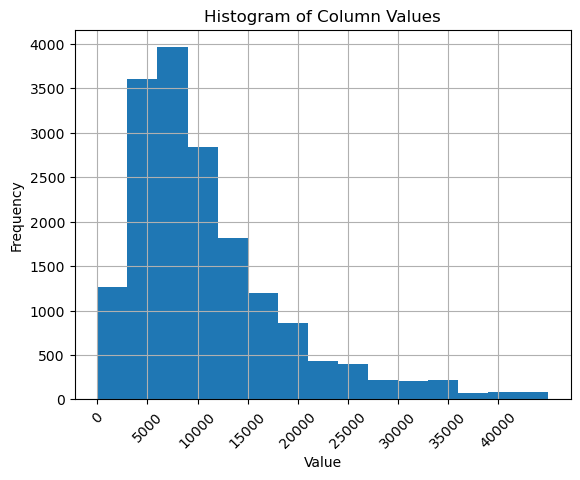

In [133]:
# Plot histogram of column values
df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'].hist(bins=15, range=(0, 45000))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column Values')

plt.xticks(range(0, 45000, 5000), rotation=45) 

plt.show()

In [134]:
# sorted(valores[:])
values = df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'].sort_values()
values[-2300:-2270]
print("Number of NaN values:", df['v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO'].isna().sum())

22787   NaN
22788   NaN
22789   NaN
22790   NaN
22791   NaN
22792   NaN
22793   NaN
22794   NaN
22795   NaN
22796   NaN
22797   NaN
22798   NaN
22800   NaN
22801   NaN
22802   NaN
22803   NaN
22804   NaN
22805   NaN
22806   NaN
22807   NaN
22808   NaN
22809   NaN
22810   NaN
22819   NaN
22820   NaN
22828   NaN
22829   NaN
22830   NaN
22831   NaN
22836   NaN
Name: v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO, dtype: float64

Number of NaN values: 10075


In [135]:
df.columns[199]
df = df.drop(df.columns[199], axis=1)

'v236 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO (SÓLO PARA QUIENES NS/NR)'

In [136]:
# df[df.columns[198:200]][0:100] # evaluar cuál conservar

In [137]:
# INGRESOS DEL HOGAR
df.columns[181:204]

Index(['v218 - INGRESOS DEL HOGAR: INGRESOS LABORALES',
       'v219 - INGRESOS DEL HOGAR: PROGRAMAS DE EMPLEO',
       'v220 - INGRESOS DEL HOGAR: JUBILACIÓN',
       'v221 - INGRESOS DEL HOGARL ALGÚN OTRO TIPO DE PENSIÓN ESPECÍFICA',
       'v222 - INGRESOS DEL HOGAR: INDEMNIZACIÓN POR DESPIDO',
       'v223 - INGRESOS DEL HOGAR: SEGURO DE DESEMPLEO',
       'v224 - INGRESOS DEL HOGAR: AUH',
       'v225 - INGRESOS DEL HOGAR: SUBSIDIO O AYUDA SOCIAL EN DINERO',
       'v226 - INGRESOS DEL HOGAR: ALQUILER DE UNA PROPIEDAD',
       'v227 - INGRESOS DEL HOGAR: GANANCIA DE ALGÚN NEGOCIO QUE NO ES SU TRABAJO',
       'v228 - INGRESOS DEL HOGAR: INTERÉS POR PLAZO FIJO O INVERSIÓN',
       'v229 - INGRESOS DEL HOGAR: BECA DE ESTUDIOS',
       'v230 - INGRESOS DEL HOGAR: CUOTA ALIMENTARIA',
       'v231 - INGRESOS DEL HOGAR: AYUDA EN DINERO DE PERSONAS QUE NO VIVEN EN EL HOGAR',
       'v232 - INGRESOS EN EFECTIVO POR LIMOSNAS, JUEGOS DE AZAR, LOTERÍA, ETC.',
       'v233 - INGRESOS DEL HOGA

In [138]:
# INGRESO DE LAS PERSONAS
df.columns[390:]

Index(['v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO',
       'v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO',
       'v213bi - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO (IMPUTADO)',
       'v214a - PERCEPCIÓN DE INGRESOS EN OTRAS OCUPACIONES DEL MES PASADO',
       'v214b - MONTO DE INGRESO NETO EN OTRAS OCUPACIONES DEL MES PASADO',
       'v214bi - MONTO DE INGRESO NETO EN OTRAS OCUPACIONES DEL MES PASADO (IMPUTADO)',
       'ITLi - MONTO DE INGRESO TOTAL LABORAL',
       'ITLi_d - GRUPO DECÍLICO DE MONTO DE INGRESO TOTAL LABORAL',
       'v215a - PERCEPCIÓN DE INGRESOS POR JUBILACIONES O PENSIONES EL MES PASADO',
       'v215b - MONTO DE INGRESO POR JUBILACIONES O PENSIONES EL MES PASADO',
       'v215bi - MONTO DE INGRESO POR JUBILACIONES O PENSIONES EL MES PASADO (IMPUTADO)',
       'v216a - PERCEPCIÓN DE INGRESOS POR PENSIONES SOCIALES, AHU U OTROS PLANES SOCIALES EL MES PASADO',
       'v216b - MONTO DE INGRESO POR P

In [139]:
df.columns[390:394]
df['v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO'].count()
df['v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO'].count()
df['v213bi - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO (IMPUTADO)'].count()
filtered = df[df['v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO'].notna() & df['v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO'].isna()]
filtered = filtered[['v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO', 'v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO', 'v213bi - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO (IMPUTADO)']]
# filtered.head(50)

Index(['v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO',
       'v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO',
       'v213bi - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO (IMPUTADO)',
       'v214a - PERCEPCIÓN DE INGRESOS EN OTRAS OCUPACIONES DEL MES PASADO'],
      dtype='object')

10896

7922

26371

In [140]:
# ingresos del hogar
subset1 = df[df.columns[181:203]]
# ingresos de personas:
subset2 = df[df.columns[390:]]

# Concatenar los dos subsets horizontalmente
ingresos = pd.concat([subset1, subset2], axis=1)
ingresos

,v218 - INGRESOS DEL HOGAR: INGRESOS LABORALES,v219 - INGRESOS DEL HOGAR: PROGRAMAS DE EMPLEO,v220 - INGRESOS DEL HOGAR: JUBILACIÓN,v221 - INGRESOS DEL HOGARL ALGÚN OTRO TIPO DE PENSIÓN ESPECÍFICA,v222 - INGRESOS DEL HOGAR: INDEMNIZACIÓN POR DESPIDO,v223 - INGRESOS DEL HOGAR: SEGURO DE DESEMPLEO,v224 - INGRESOS DEL HOGAR: AUH,v225 - INGRESOS DEL HOGAR: SUBSIDIO O AYUDA SOCIAL EN DINERO,v226 - INGRESOS DEL HOGAR: ALQUILER DE UNA PROPIEDAD,v227 - INGRESOS DEL HOGAR: GANANCIA DE ALGÚN NEGOCIO QUE NO ES SU TRABAJO,v228 - INGRESOS DEL HOGAR: INTERÉS POR PLAZO FIJO O INVERSIÓN,v229 - INGRESOS DEL HOGAR: BECA DE ESTUDIOS,v230 - INGRESOS DEL HOGAR: CUOTA ALIMENTARIA,v231 - INGRESOS DEL HOGAR: AYUDA EN DINERO DE PERSONAS QUE NO VIVEN EN EL HOGAR,"v232 - INGRESOS EN EFECTIVO POR LIMOSNAS, JUEGOS DE AZAR, LOTERÍA, ETC.",v233 - INGRESOS DEL HOGAR: INGRESOS EN EFECTIVO POR AYUDA DE LOS NIÑXS QUE PIDEN O HACE ALGUNA CHANGA O TRABAJO,v234 - CANTIDAD DE APORTANTES DE INGRESOS MONETARIOS QUE VIVEN EN ESTE HOGAR,v235 - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO,v235i - INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO (IMPUTADO),v235i_d - GRUPOS DECÍLICOS DE INGRESO EN DINERO TOTAL DEL HOGAR EL MES PASADO (IMPUTADO),ITHPC - INGRESO TOTAL DEL HOGAR (IMPUTADO) PER CÁPITA,ITHPC_d - GRUPOS DECÍLICOS DE INGRESO TOTAL DEL HOGAR (IMPUTADO) PER CÀPITA,v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO,v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO,v213bi - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO (IMPUTADO),v214a - PERCEPCIÓN DE INGRESOS EN OTRAS OCUPACIONES DEL MES PASADO,v214b - MONTO DE INGRESO NETO EN OTRAS OCUPACIONES DEL MES PASADO,v214bi - MONTO DE INGRESO NETO EN OTRAS OCUPACIONES DEL MES PASADO (IMPUTADO),ITLi - MONTO DE INGRESO TOTAL LABORAL,ITLi_d - GRUPO DECÍLICO DE MONTO DE INGRESO TOTAL LABORAL,v215a - PERCEPCIÓN DE INGRESOS POR JUBILACIONES O PENSIONES EL MES PASADO,v215b - MONTO DE INGRESO POR JUBILACIONES O PENSIONES EL MES PASADO,v215bi - MONTO DE INGRESO POR JUBILACIONES O PENSIONES EL MES PASADO (IMPUTADO),"v216a - PERCEPCIÓN DE INGRESOS POR PENSIONES SOCIALES, AHU U OTROS PLANES SOCIALES EL MES PASADO","v216b - MONTO DE INGRESO POR PENSIONES SOCIALES, AHU U OTROS PLANES SOCIALES EL MES PASADO","v216bi - MONTO DE INGRESO POR PENSIONES SOCIALES, AHU U OTRO PLANES SOCIALES EL MES PASADO (IMPUTADO)",v217a - PERCEPCIÓN DE OTROS INGRESOS EL MES PASADO,v217b - MONTO DE INGRESOS EL MES PASADO,v217bi - MONTO DE OTROS INGRESOS EL MES PASADO (IMPUTADO),ITI,ITI_d - GRUPO DECÍLICO DE MONTO DE INGRESO TOTAL INDIVIDUAL
0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8500.0,8500.0,4.0,1700.000000,2.0,1.0,4500.0,4500.0,0.0,NaN,0.0,4500.0,5.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,4500.0,6.0
1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8500.0,8500.0,4.0,1700.000000,2.0,1.0,4000.0,4000.0,0.0,NaN,0.0,4000.0,4.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,4000.0,5.0
2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8500.0,8500.0,4.0,1700.000000,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8500.0,8500.0,4.0,1700.000000,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8500.0,8500.0,4.0,1700.000000,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27615,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,33804.0,37185.0,10.0,5312.142857,7.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
27616,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,33804.0,37185.0,10.0,5312.142857,7.0,NaN,N

In [141]:
ingresos_filtrados = ingresos[ingresos['v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO'].notna() & df['v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO'].isna()]
# ingresos_filtrados

In [142]:
#########################################################################
#########################################################################
##################### VARIABLES INTERGENERACIONALES #####################
#########################################################################
#########################################################################

In [143]:
df.columns[np.r_[207:226, 233:252]]

# EVALUAR SI ELIMINARLAS O INCORPORARLAS EN EL ANÁLISIS DE CLASE
# df = df.drop(df.columns[np.r_[207:229, 233:255]], axis=1)

Index(['v238a - PSH: PARENTESCO CON PSH DE HOGAR A LOS 15 AÑOS',
       'v239a - PSH: LUGAR DE NACIMIENTO DE PSH DE HOGAR A LOS 15 AÑOS',
       'v240a - PSH: MÁXIMO NIVEL EDUCATIVO DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v241a - PFINALIDAD DE NIVEL EDUCATIVO DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v242a - PSH: ÚLTIMO AÑO APROBADO DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v243a - PSH: CÓNYUGE DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v244a - MÁXIMO NIVEL EDUCATIVO DE CÓNYUGE DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v245a - PSH: FINALIDAD DE NIVEL EDUCATIVO DE CÓNYUGE DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v246a - PSH: ÚLTIMO AÑO APROBADO DEL CÓNYUGE DEL PSH DE HOGAR A LOS 15 AÑOS',
       'v247a_CIUO08 - PSH: TIPO DE OCUPACIÓN (CÓDIGO INTERNACIONAL UNIFORME DE OCUPACIONES)',
       'v247a_CNO01 -PSH: TIPO DE OCUPACIÓN (CÓDIGO INTERNACIONAL UNIFORME DE OCUPACIONES)',
       'v250a - PSH: ROL DE SUPERVISIÓN DEL PSH DEL HOGAR A LOS 15 AÑOS',
       'v251a - PSH: CANTIDAD DE PERSONAS SUP

In [144]:
#########################################################################
#########################################################################
############################## CLASE SOCIAL #############################
#########################################################################
#########################################################################

In [145]:
df.columns[np.r_[226:228, 252:254]]

Index(['egp11a - PSH: CLASE SOCIAL (EGP CASMISN, GANZEBOOM Y TEIMAN)',
       'CSOa - PSH: CONDICIÓN SOCIO-OCUPACIONAL',
       'egp11b - CÓNYUGE: CLASE SOCIAL (EGP CASMISN, GANZEBOOM Y TREIMAN)',
       'CSOb - CÓNYUGE: CONDICIÓN SOCIO-OCUPACIONAL'],
      dtype='object')

In [146]:
#########################################################################
#########################################################################
############ (AUTOPERCEPCIÓN) CLASE SOCIAL DEL PSH Y CONYUGE ############
#########################################################################
#########################################################################

In [147]:
df.columns[np.r_[228:232, 254:258]]

# 258 ¿Dónde se ubicaría usted en la siguiente escala de posiciones sociales, que va de 1 (lo más bajo) a 10 (lo más alto)?
# 259 ¿Se considera usted a sí mismo como perteneciendo a una clase social?
# 260 ¿Qué clase sería...?
# 261 Si usted tuviera que elegir, ¿diría que usted pertenece a...?

Index(['v258a - PSH: AUTOUBICACIÓN EN LA ESCALA DE POSICIÓN SOCIAL',
       'v259a - PSH: PERTENENCIA A CLASE SOCIAL',
       'v260a - PSH: CLASE SOCIAL DE PERTENENCIA',
       'V261a - PSH: CLASE SOCIAL DE PERTENENCIA FORZADA',
       'v258b - CÓNYUGE: AUTOUBICACIÓN EN LA ESCALA DE POSICIÓN SOCIAL',
       'v259b - CÓNYUGE: PERTENENCIA A CLASE SOCIAL',
       'v260b - CÓNYUGE: CLASE SOCIAL DE PERTENENCIA',
       'v261b - CÓNYUGE: CLASE SOCIAL DE PERTENENCIA FORZADA'],
      dtype='object')

In [148]:
## Analizar la variable parentesco con el PSH (111)

df.columns[262]

# 1 | PSH
# 2 | Cónyuge
# 3 | Hijo/a
# 4 | Hijastro/a
# 5 | Yerno / Nuera 6 | Hermano/a
# 7 | Nieto/a
# 8 | Cuñado/a
# 9 | Padre / Madre / Suegro / Suegra
# 10 | Otros familiares
# 11 | Servicio doméstico
# 12 | Otros no familiares

'v111 - PARENTESCO PSH'

In [149]:
df.columns[258:292]

Index(['miembro', 'f_calib3', 'v108 - EDAD', 'v109 - SEXO',
       'v111 - PARENTESCO PSH', 'v112 - CONVIVE CON MADRE',
       'v113 - CONVIVE CON PADRE', 'hijxs_en_vhog', 'v114 - TIENE PAREJA',
       'v115 - CONVIVE CON PAREJA', 'pareja_nuclear', 'v116 - ESTADO CIVIL',
       'c_hogar - COMPOSICION DEL HOGAR',
       't_hogar - CANTIDAD DE PERSONAS EN EL HOGAR',
       'v117 - SABE LEER Y ESCRIBIR', 'v118a - IDIOMA EXTRANJERO',
       'v118b - IDIOMA EXTRANJERO', 'v118c - LENGUA ORIGINARIA',
       'v119 - MANEJO DE COMPUTADORA',
       'v120 - ASISTENCIA A ESTABLECIMIENTO EDUCATIVO',
       'v121 - NIVEL MÁS ALTO', 'v122 - FINALIZACIÓN DEL NIVEL',
       'v123 - ULTIMO AÑO APROBADO',
       'v124 - TIPO DE GESTION DEL ESTABLECIMIENTO', 'v125 - TIPO DE JORNADA',
       'nivel_ed - MAXIMO NIVEL EDUCATIVO ALCANZADO',
       'v126 - PERSONA CON LA QUE PERMANECE LA MAYOR PARTE DEL TIEMPO',
       'v127 - ASISTENCIA A JARDI, GUARDERIA',
       'v128 - DIFICULTAD PARA ORGANIZAR EL CUIDADO 

In [150]:
##########################
### COBERTURA DE SALUD ###
##########################

In [151]:
df.columns[292:294]

Index(['v134a - PRINCIPAL COBERTURA DE SALUD', 'v134b - PRINCIPAL COBERTURA DE SALUD'], dtype='object')

In [152]:
var = 'PRINCIPAL COBERTURA DE SALUD:'
ob_s_ = ' OBRA SOCIAL'
pp_ = ' PREPAGA'
pp_ob_s_ = ' PREPAGA A TRAVES DE OBRA SOCIAL'
pami_ = ' PAMI'
i_s_ = ' INCLUIR SALUD'
e_med_ = ' EMERGENCIAS MEDICAS'
nin_ = ' NO TIENE'
ls = [(var+ ob_s_), (var+ pp_), (var+pp_ob_s_), (var+ pami_), (var+ i_s_), 
     (var+ e_med_), (var+ nin_)]
ls

['PRINCIPAL COBERTURA DE SALUD: OBRA SOCIAL',
 'PRINCIPAL COBERTURA DE SALUD: PREPAGA',
 'PRINCIPAL COBERTURA DE SALUD: PREPAGA A TRAVES DE OBRA SOCIAL',
 'PRINCIPAL COBERTURA DE SALUD: PAMI',
 'PRINCIPAL COBERTURA DE SALUD: INCLUIR SALUD',
 'PRINCIPAL COBERTURA DE SALUD: EMERGENCIAS MEDICAS',
 'PRINCIPAL COBERTURA DE SALUD: NO TIENE']

In [153]:
subset = df[df.columns[292:294]]
# subset

In [154]:
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix= ['', ''])
b = a.groupby(a.columns[:], axis=1).sum()
b.columns= ls
# b

In [155]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]
df = df.drop(df.columns[292:294], axis= 1)

In [156]:
cols = list(df.columns[:292]) + list(df.columns[-7:]) + list(df.columns[292:-7])
df = df[cols]
# df.columns

In [157]:
#############################
#### BENEFICIOS SOCIALES ####
#############################

In [158]:
df.columns[311:314]

Index(['v147a - ORIGEN DE INGRESOS POR BENEFICIO SOCIAL',
       'v147b - ORIGEN DE INGRESO POR BENEFICIO SOCIAL',
       'v147c - ORIGEN DE INGRESOS POR BENEFICIO SOCIAL'],
      dtype='object')

In [159]:
var= 'BENEFICIO SOCIAL: '
pen_ = 'PENSION POR 7 HIJXS'
pen_in_ = 'PENSION POR INVALIDEZ O DISCAPACIDAD'
prog_ = 'PROGRESAR'
ot_p_nn_ = 'OTRAS PENSIONES NO CONTRIBUTIVAS'
ot_pr_ae_ = 'OTROS PROGRAMAS DE AYUDA ECONOMICA'
nin_ = 'NINGUNO'
ls = [(var+ pen_), (var+ pen_in_), (var+prog_), (var+ot_p_nn_), (var+ot_pr_ae_), (var+ nin_)]
ls

['BENEFICIO SOCIAL: PENSION POR 7 HIJXS',
 'BENEFICIO SOCIAL: PENSION POR INVALIDEZ O DISCAPACIDAD',
 'BENEFICIO SOCIAL: PROGRESAR',
 'BENEFICIO SOCIAL: OTRAS PENSIONES NO CONTRIBUTIVAS',
 'BENEFICIO SOCIAL: OTROS PROGRAMAS DE AYUDA ECONOMICA',
 'BENEFICIO SOCIAL: NINGUNO']

In [160]:
subset = df[df.columns[311:314]]
# subset

In [161]:
subset = subset.astype(pd.CategoricalDtype())
a= pd.get_dummies(subset, prefix= ['','',''])
b= a.groupby(a.columns[:], axis= 1).sum()
b.columns= ls

In [162]:
subset.columns

Index(['v147a - ORIGEN DE INGRESOS POR BENEFICIO SOCIAL',
       'v147b - ORIGEN DE INGRESO POR BENEFICIO SOCIAL',
       'v147c - ORIGEN DE INGRESOS POR BENEFICIO SOCIAL'],
      dtype='object')

In [163]:
# subset[~subset[['v147a - ORIGEN DE INGRESOS POR BENEFICIO SOCIAL',
#                                 'v147b - ORIGEN DE INGRESO POR BENEFICIO SOCIAL',
#                                 'v147c - ORIGEN DE INGRESOS POR BENEFICIO SOCIAL']].isin([pd.NA, 6]).any(axis=1)]

In [164]:
# b.iloc[:, :-1][(b.iloc[:, :-1] != 0).any(axis=1)]

In [165]:
df.loc[:, b.columns] = b.loc[:, b.columns[:]]
df = df.drop(df.columns[311:314], axis=1)

In [166]:
cols= list(df.columns[:311]) + list(df.columns[-6:]) + list(df.columns[311:-6])
df = df[cols]

In [167]:
#########################################################################
#########################################################################
###################### Bloque Lugar de Nacimiento #######################
#########################################################################
#########################################################################

In [168]:
df.columns[317:325]

Index(['v148 - DESCENDENCIA DE PUEBLO INDÍGENA O AFRODESCENDIENTE',
       'v149a - LUGAR DE NACIMIENTO', 'v149b_pcia PROVINCIA DE NACIMIENTO',
       'v150 - PAIS DE NACIMIENTO', 'v150b_pais - PAIS DE NACIMIENTO',
       'v151 - AÑO DE LLEGADA A LA ARGENTINA',
       'v152a - LUGAR DE RESIDENCIA HACE 5 AÑOS',
       'v152b_lugar - PROVINCIA O PAIS DE RESIDENCIA HACE 5 AÑOS'],
      dtype='object')

In [169]:
subset = df[df.columns[318:321]]
# subset

In [170]:
pd.set_option('display.max_rows', None)

In [171]:
print('De', df.shape[0], 'observaciones:')

df.columns[318]

tres= df.loc[df.iloc[:,318].isin([3])].shape[0] # Lugar de nacimiento en otra provincia
uno_dos= df.loc[df.iloc[:,318].isin([1,2])].shape[0] # Lugar de nacimiento en esta provincia
cuatro_cinco= df.loc[df.iloc[:,318].isin([4,5])].shape[0]
# print('PAISES LIMITROFES:', df.loc[df.iloc[:,318].isin([4])].shape[0])
# print('OTROS PAISES:', df.loc[df.iloc[:,318].isin([5])].shape[0])
print('PROVINCIAS ARGENTINAS:', uno_dos + tres, 'observaciones')
print('OTRO PAIS:', cuatro_cinco, 'observaciones')
print('NaN:', df.loc[df.iloc[:,318].isna()].shape[0])
print('')
print('Declaran nacer en otra provicia', df.loc[df.iloc[:,318].isin([3])].shape[0], 'registros')
print('De los cuales solo', df.loc[df.iloc[:,319].notna()].shape[0], 'aclaran en cual')
print('')
print(df.columns[319], 'puede ser CUALQUIER PROVINCIA:')
print(np.array(sorted(df[df.columns[319]].unique())))

# filtered = df[df[df.columns[318]] == 3]
filtered = df[(df[df.columns[318]] == 3)  & (df[df.columns[319]].isna())]
print('')
print('(Hay', filtered.shape[0], 'valores NaN de los que declaran haber nacido en otras provincias)')

# filtered[list(filtered.columns[318:325])]

print('')
print('No hay información de provincia de nacimiento en', df.loc[df[df.columns[319]].isna()].shape[0], 'registros')
# 24766 - 23360 - 219 - 722 - 465
print('LOCALES:', df.loc[df.iloc[:,318].isin([1,2])].shape[0] )
filtered = df[(df[df.columns[318]].isin([1,2]) )  & (df[df.columns[319]].isna())]
print('(De los cuales', filtered.shape[0], 'no tienen registro de la provincia)')
print('Imputar estos', filtered.shape[0], 'NaN por', df.columns[1], 'y', df.columns[2][-10:])


De 27620 observaciones:


'v149a - LUGAR DE NACIMIENTO'

PROVINCIAS ARGENTINAS: 26433 observaciones
OTRO PAIS: 722 observaciones
NaN: 465

Declaran nacer en otra provicia 3073 registros
De los cuales solo 2854 aclaran en cual

v149b_pcia PROVINCIA DE NACIMIENTO puede ser CUALQUIER PROVINCIA:
[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.]

(Hay 219 valores NaN de los que declaran haber nacido en otras provincias)

No hay información de provincia de nacimiento en 24766 registros
LOCALES: 23360
(De los cuales 23360 no tienen registro de la provincia)
Imputar estos 23360 NaN por Region y AGLOMERADO


In [172]:
# Registros sin información sobre la provincia de nacimiento
registros_NaN= df[df.columns[319]].isna().sum()

In [173]:
# Registros con información de Aglomerado y lugar de Nacimiento en localidad de esa provincia
a_imputar= (( df[df.columns[2]].isin([1,2,3,4,5]) ) & ( df[df.columns[318]].isin([1,2]) )).sum()
print('Registros que deberían quedar una vez imputados los NaN en base a la variable Aglomerado y lugar de Nacimiento:',
registros_NaN - a_imputar)

Registros que deberían quedar una vez imputados los NaN en base a la variable Aglomerado y lugar de Nacimiento: 16440


In [174]:
sorted(df[df.columns[1]].unique())
# 1 Gran Buenos Aires (CABA y 24 partidos de Buenos Aires)
# 3 Cuyo (Mendoza, San Juan y San Luis)
# 4 Pampeana (resto de Buenos Aires y La Pampa)
# 5 Centro (Córdoba, Entre Ríos y Santa Fe)
# 6 NEA (Chaco, Corrientes, Formosa y Misiones)
# 7 NOA (Catamarca, Jujuy, La Rioja, Salta, Santiago del Estero y Tucumán)
# 8 Patagonia (Chubut, Neuquen, Río Negro, Santa Cruz y Tierra del Fuego)

sorted(df[df.columns[2]].unique())
# 1 CABA
# 2 Partidos del GBA
# 3 Gran Córdoba
# 4 Gran Rosario
# 5 Gran Mendoza

[1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, nan]

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan]

In [175]:
df.columns[1], df.columns[319]

('Region', 'v149b_pcia PROVINCIA DE NACIMIENTO')

In [176]:
((df[df.columns[1]] ==1) & (df[df.columns[318]].isin([1,2])) ).sum()

3761

In [177]:
print('Hay', (df[df.columns[1]] ==1).sum(), 'registros de la región de Buenos Aires de los cuales',
      ((df[df.columns[1]] ==1) & (df[df.columns[318]].isin([1,2]))).sum(),
      'son oriundos de esa provincia.')

print('Hay', ((df[df.columns[1]] ==1) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna()) ).sum(), 'registros NaN (variable provincia) que sabemos que son de Buenos Aires.') 

# Imputamos
df.loc[ (df[df.columns[1]] == 1) & (df[df.columns[318]].isin([1,2])) , df.columns[319]] = 1

Hay 4843 registros de la región de Buenos Aires de los cuales 3761 son oriundos de esa provincia.
Hay 3761 registros NaN (variable provincia) que sabemos que son de Buenos Aires.


In [178]:
print('Hay', ((df[df.columns[1]] ==1) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna()) ).sum(), 'registros NaN (variable provincia) que sabemos que son de Buenos Aires.') 

Hay 0 registros NaN (variable provincia) que sabemos que son de Buenos Aires.


In [179]:
print('Hay', ((df[df.columns[1]] ==1) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]]==1 )).sum(), 'registros NaN (variable provincia) que sabemos que son de Buenos Aires.')
print('Hay', ((df[df.columns[1]]==1) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna() )).sum(), 'registros NaN (variable provincia) que sabemos que son de Buenos Aires.')

print('Hay', ((df[df.columns[1]] == 1) & (df[df.columns[319]] == 1)).sum(), 'registros en Buenos Aires que nacieron en la provincia de Buenos Aires.')
print('Hay', (df[df.columns[319]] == 1).sum(), 'registros que nacieron en la provincia Buenos Aires')

Hay 3761 registros NaN (variable provincia) que sabemos que son de Buenos Aires.
Hay 0 registros NaN (variable provincia) que sabemos que son de Buenos Aires.
Hay 3844 registros en Buenos Aires que nacieron en la provincia de Buenos Aires.
Hay 4388 registros que nacieron en la provincia Buenos Aires


In [180]:
df[df.columns[319]].isna().sum()

21005

In [181]:
df.columns[319]
df.columns[318]

'v149b_pcia PROVINCIA DE NACIMIENTO'

'v149a - LUGAR DE NACIMIENTO'

In [182]:
sorted(df[df.columns[2]].unique())
# 1 CABA
# 2 Partidos del GBA
# 3 Gran Córdoba
# 4 Gran Rosario
# 5 Gran Mendoza
# 6 Resto de aglomerados

print('Hay', ( (df[df.columns[2]].isin([1,2])) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna() ) ).sum(), 'registros NaN (variable provincia) que sabemos que son de Buenos Aires.')


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan]

Hay 0 registros NaN (variable provincia) que sabemos que son de Buenos Aires.


In [183]:
print('Hay', ( (df[df.columns[2]]==3) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna() ) ).sum(), 'registros NaN (variable provincia) que sabemos que son de Córdoba.')

print('* Hay', ( (df[df.columns[2]]==3) & (df[df.columns[318]].isna() ) & 
                (df[df.columns[319]].isna() ) ).sum(),
      'registros en Córdoba que no sabemos el lugar ni provincia de nacimiento.')

filtered_rows = df[(df[df.columns[2]]==3) & (df[df.columns[318]].isin([1, 2]))]
filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]].head()
filtered_rows.shape

# Personas en Córdoba de otro país
# filtered_rows = df[(df[df.columns[2]]==3) & (df[df.columns[318]].notna()) & (df[df.columns[319]].isna())]
# # filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]]
# filtered_rows.shape

# Imputamos

df.loc[ (df[df.columns[2]] == 3) & (df[df.columns[318]].isin([1,2])) &
      (df[df.columns[319]].isna() )  , df.columns[319]] = 1

((df[df.columns[2]]==3) & (df[df.columns[318]].isin([1, 2])) &
                  (df[df.columns[319]].isna())).sum()

filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]].head()


Hay 1608 registros NaN (variable provincia) que sabemos que son de Córdoba.
* Hay 37 registros en Córdoba que no sabemos el lugar ni provincia de nacimiento.


,Region,aglo - AGLOMERADO,v149a - LUGAR DE NACIMIENTO,v149b_pcia PROVINCIA DE NACIMIENTO
7915,5.0,3.0,1.0,NaN
7916,5.0,3.0,1.0,NaN
7917,5.0,3.0,1.0,NaN
7918,5.0,3.0,1.0,NaN
7919,5.0,3.0,1.0,NaN


(1608, 417)

0

,Region,aglo - AGLOMERADO,v149a - LUGAR DE NACIMIENTO,v149b_pcia PROVINCIA DE NACIMIENTO
7915,5.0,3.0,1.0,NaN
7916,5.0,3.0,1.0,NaN
7917,5.0,3.0,1.0,NaN
7918,5.0,3.0,1.0,NaN
7919,5.0,3.0,1.0,NaN


In [184]:
print('Hay', ( (df[df.columns[2]]==4) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna() ) ).sum(), 'registros NaN (variable provincia) que sabemos que son de Rosario.')

print('Hay', ( (df[df.columns[2]]==4) & (df[df.columns[318]].isna() ) & 
                (df[df.columns[319]].isna() ) ).sum(),
      'registros en Rosario que no sabemos el lugar ni provincia de nacimiento.')

filtered_rows = df[(df[df.columns[2]]==4) & (df[df.columns[318]].isin([1, 2]))]
filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]].head()
filtered_rows.shape

# Imputamos

df.loc[ (df[df.columns[2]] == 4) & (df[df.columns[318]].isin([1,2])) &
      (df[df.columns[319]].isna() )  , df.columns[319]] = 1

((df[df.columns[2]]==4) & (df[df.columns[318]].isin([1, 2])) &
                  (df[df.columns[319]].isna())).sum()

filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]].head()



Hay 1458 registros NaN (variable provincia) que sabemos que son de Rosario.
Hay 4 registros en Rosario que no sabemos el lugar ni provincia de nacimiento.


,Region,aglo - AGLOMERADO,v149a - LUGAR DE NACIMIENTO,v149b_pcia PROVINCIA DE NACIMIENTO
20730,5.0,4.0,1.0,NaN
20732,5.0,4.0,1.0,NaN
20733,5.0,4.0,1.0,NaN
20734,5.0,4.0,1.0,NaN
20735,5.0,4.0,1.0,NaN


(1458, 417)

0

,Region,aglo - AGLOMERADO,v149a - LUGAR DE NACIMIENTO,v149b_pcia PROVINCIA DE NACIMIENTO
20730,5.0,4.0,1.0,NaN
20732,5.0,4.0,1.0,NaN
20733,5.0,4.0,1.0,NaN
20734,5.0,4.0,1.0,NaN
20735,5.0,4.0,1.0,NaN


In [185]:
print('Hay', ( (df[df.columns[2]]==5) & (df[df.columns[318]].isin([1,2])) &
        (df[df.columns[319]].isna() ) ).sum(), 'registros NaN (variable provincia) que sabemos que son de Mendoza.')

print('Hay', ( (df[df.columns[2]]==5) & (df[df.columns[318]].isna() ) & 
                (df[df.columns[319]].isna() ) ).sum(),
      'registros en Mendoza que no sabemos el lugar ni provincia de nacimiento.')

filtered_rows = df[(df[df.columns[2]]==5) & (df[df.columns[318]].isin([1, 2]))]
filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]].head()
filtered_rows.shape

# Imputamos
df.loc[ (df[df.columns[2]] == 5) & (df[df.columns[318]].isin([1,2])) &
      (df[df.columns[319]].isna() ) , df.columns[319]] = 1

((df[df.columns[2]]==5) & (df[df.columns[318]].isin([1, 2])) &
                  (df[df.columns[319]].isna())).sum()

filtered_rows[[df.columns[1], df.columns[2], df.columns[318], df.columns[319]]].head()

Hay 1499 registros NaN (variable provincia) que sabemos que son de Mendoza.
Hay 11 registros en Mendoza que no sabemos el lugar ni provincia de nacimiento.


,Region,aglo - AGLOMERADO,v149a - LUGAR DE NACIMIENTO,v149b_pcia PROVINCIA DE NACIMIENTO
958,3.0,5.0,1.0,NaN
959,3.0,5.0,2.0,NaN
960,3.0,5.0,2.0,NaN
961,3.0,5.0,2.0,NaN
962,3.0,5.0,2.0,NaN


(1499, 417)

0

,Region,aglo - AGLOMERADO,v149a - LUGAR DE NACIMIENTO,v149b_pcia PROVINCIA DE NACIMIENTO
958,3.0,5.0,1.0,NaN
959,3.0,5.0,2.0,NaN
960,3.0,5.0,2.0,NaN
961,3.0,5.0,2.0,NaN
962,3.0,5.0,2.0,NaN


In [186]:
print('Quedan', df[df.columns[319]].isna().sum(), 'registros NaN en provincia de nacimiento')

Quedan 16440 registros NaN en provincia de nacimiento


In [187]:
# PAIS DE NACIMIENTO

In [188]:
df.columns[318]
sorted(df[df.columns[318]].unique()) # LUGAR DE NACIMIENTO
df.columns[319]
sorted(df[df.columns[319]].unique())  # PROVINCIAS
df.columns[320]
sorted(df[df.columns[320]].unique()) # PAIS DE NACIMIENTO
df.columns[321]
sorted(df[df.columns[321]].unique()) # PAIS DE NACIMIENTO_B

'v149a - LUGAR DE NACIMIENTO'

[1.0, 2.0, 3.0, nan, 4.0, 5.0]

'v149b_pcia PROVINCIA DE NACIMIENTO'

[nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0]

'v150 - PAIS DE NACIMIENTO'

[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

'v150b_pais - PAIS DE NACIMIENTO'

[nan, 37.0, 38.0, 39.0, 41.0, 46.0]

In [189]:
df.columns[320]
sorted(df[df.columns[320]].unique())
# 1 Paraguay 
# 2 Bolivia 
# 3 Uruguay
# 4 Chile
# 5 Perú
# 6 Otros países sudamericanos 
# 7 Otros países

'v150 - PAIS DE NACIMIENTO'

[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [190]:
# TODAS LAS PERSONAS QUE NACIERON EN OTRO PAÍS DECLARARON EN QUÉ PAIS NACIERON

# filtered_rows = df[ (df[df.columns[318]].isin([4,5]))]
# filtered_rows[[df.columns[318], df.columns[320]]]
filtered_rows = df[ (df[df.columns[318]].isin([4,5])) & (df[df.columns[320]].isna())]
# filtered_rows[[df.columns[318], df.columns[320]]]
filtered_rows.shape[0]

0

In [191]:
# Registros que nacieron en otro país (4 y 5 en v149 Lugar de nacimiento)
# y que nacieron en otros paises (6 y 7 en v150 Pais de nacimiento)

filtered_rows = df[ (df[df.columns[318]].isin([4,5]))]
print('Hay', filtered_rows.shape[0], 'registros que nacieron en paises limítrofes u otros paises - variable Lugar de Nacimiento.')

filtered_rows = df[ (df[df.columns[318]].isin([4,5])) & (df[df.columns[320]].isin([6, 7]))]
print('De estos,', filtered_rows.shape[0], 'nacieron en otros paises sudamericanos u otros paises - variable Pais de Nacimiento.')

filtered_rows = df[ (df[df.columns[320]].isin([6, 7])) ]
print('(Los', filtered_rows.shape[0], 'registros tienen completa la variable Lugar de Nacimiento).')

Hay 722 registros que nacieron en paises limítrofes u otros paises - variable Lugar de Nacimiento.
De estos, 14 nacieron en otros paises sudamericanos u otros paises - variable Pais de Nacimiento.
(Los 14 registros tienen completa la variable Lugar de Nacimiento).


In [192]:
# Reemplazo 6 y 7 con nuevos codigos de paises (v150b pais de nacimiento)

df.columns[321]
sorted(df[df.columns[321]].unique())
# 37 Ecuador  -----> 6
# 38 España   -----> 7
# 39 Estados Unidos    -----> 8
# 41 Italia  -----> 9
# 46 Rusia   -----> 10

old= list(df[df.columns[321]].unique())
new= list(range(6,11))

'v150b_pais - PAIS DE NACIMIENTO'

[nan, 37.0, 38.0, 39.0, 41.0, 46.0]

In [193]:
# df.loc[ (df[df.columns[2]] == 5) & 
#        (df[df.columns[318]].isin([1,2])) &
#       (df[df.columns[319]].isna() ) , df.columns[319]] = 1

In [194]:
old= sorted(list(df[df.columns[321]].unique())[1:])
new= list(range(6,11))
# Create a dictionary to map old values to new values
value_map = dict(zip(old, new))
value_map

{37.0: 6, 38.0: 7, 39.0: 8, 41.0: 9, 46.0: 10}

In [195]:
# Update values in column 320 based on values in column 321
for old_value, new_value in value_map.items():
    df.loc[ df[df.columns[321]] == old_value, df.columns[320]] = new_value

In [196]:
filtered_rows = df[ (df[df.columns[320]].isin(new)) ]
filtered_rows[[df.columns[318], df.columns[320], df.columns[321]]]

,v149a - LUGAR DE NACIMIENTO,v150 - PAIS DE NACIMIENTO,v150b_pais - PAIS DE NACIMIENTO
1135,5.0,7.0,38.0
1149,5.0,6.0,37.0
1194,5.0,8.0,39.0
1254,5.0,7.0,38.0
1284,5.0,7.0,38.0
1840,5.0,7.0,38.0
1879,5.0,7.0,38.0
7644,5.0,7.0,38.0
11378,5.0,8.0,39.0
17546,5.0,10.0,46.0


In [197]:
df = df.drop(df.columns[321], axis=1)
df.columns[321]

'v151 - AÑO DE LLEGADA A LA ARGENTINA'

In [198]:
df.columns[318:322]

Index(['v149a - LUGAR DE NACIMIENTO', 'v149b_pcia PROVINCIA DE NACIMIENTO',
       'v150 - PAIS DE NACIMIENTO', 'v151 - AÑO DE LLEGADA A LA ARGENTINA'],
      dtype='object')

In [199]:
df.columns[321:324]

Index(['v151 - AÑO DE LLEGADA A LA ARGENTINA',
       'v152a - LUGAR DE RESIDENCIA HACE 5 AÑOS',
       'v152b_lugar - PROVINCIA O PAIS DE RESIDENCIA HACE 5 AÑOS'],
      dtype='object')

In [200]:
df.columns[318]
# 1 En esta localidad
# 2 En otra localidad de esta provincia
# 3 En otra provincia

filtered_rows = df[ (df[df.columns[318]].isin([1,2,3])) ]
# filtered_rows[[df.columns[318], df.columns[320], df.columns[321]]]
print('Registros que nacieron en Argentina:', filtered_rows.shape[0])

df[df.columns[320]].unique()
# 1 Paraguay
# 2 Bolivia
# 3 Uruguay
# 4 Chile
# 5 Perú 
# 6 Ecuador
# 7 España
# 8 Estados Unidos
# 9 Italia
# 10 Rusia

pais= list(range(1,11))
filtered_rows = df[ (df[df.columns[320]].isin(pais)) ]
print('Registros que nacieron en otro pais:', filtered_rows.shape[0])

'v149a - LUGAR DE NACIMIENTO'

Registros que nacieron en Argentina: 26433


array([nan,  3.,  4.,  1.,  5.,  2.,  7.,  6.,  8., 10.,  9.])

Registros que nacieron en otro pais: 722


In [201]:
df.columns[320]
print('Registros con dato en pais de nacimiento:', df[df.columns[320]].isin(pais).sum())
print('Registros NaN en pais de nacimiento:', df[df.columns[320]].isna().sum())

df.columns[318]
df.loc[df[df.columns[318]].isin([1,2,3]), df.columns[320]] = 11

# 11 Argentina

df[df.columns[320]].isna().sum()

'v150 - PAIS DE NACIMIENTO'

Registros con dato en pais de nacimiento: 722
Registros NaN en pais de nacimiento: 26898


'v149a - LUGAR DE NACIMIENTO'

465

In [202]:
df.columns[322]
# 1 En esta localidad
# 2 En otra localidad de esta provincia
# 3 En otra provincia
# 4 Países limítrofes
# 5 Otros países

lugar_ = list(range(3,6))
lugar_

sorted(df[df.columns[323]].unique())

# 31 Angola ---> 1
# 32 Bolivia ---> 2
# 33 Brasil ---> 3
# 34 Colombia ---> 4
# 35 Chile ---> 5
# 36 Cuba ---> 6
# 37 Ecuador ---> 7
# 38 España ---> 8
# 39 Estados Unidos ---> 9
# 40 India ---> 10
# 41 Italia ---> 11
# 42 Méjico ---> 12
# 43 Paraguay ---> 13
# 44 Perú ---> 14
# 45 Puerto Rico ---> 15
# 47 Suiza ---> 16
# 48 Trinidad y Tobago ---> 17
# 49 Uruguay ---> 18
# 50 Venezuela ---> 19

'v152a - LUGAR DE RESIDENCIA HACE 5 AÑOS'

[3, 4, 5]

[nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 24.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 47.0,
 48.0,
 49.0,
 50.0]

In [203]:
old= sorted(list(df[df.columns[323]].unique()))[22:]
new= list(range(1,20))

# Create a dictionary to map old values to new values
value_map = dict(zip(old, new))
value_map

{31.0: 1,
 32.0: 2,
 33.0: 3,
 34.0: 4,
 35.0: 5,
 36.0: 6,
 37.0: 7,
 38.0: 8,
 39.0: 9,
 40.0: 10,
 41.0: 11,
 42.0: 12,
 43.0: 13,
 44.0: 14,
 45.0: 15,
 47.0: 16,
 48.0: 17,
 49.0: 18,
 50.0: 19}

In [204]:
df.columns[323]

'v152b_lugar - PROVINCIA O PAIS DE RESIDENCIA HACE 5 AÑOS'

In [205]:
# Creo la variable 'PAIS DE RESIDENCIA HACE 5 AÑOS'
df['PAIS DE RESIDENCIA HACE 5 AÑOS'] = np.nan
# df.columns[-1]

In [206]:
# Le asigno los valores en base a la columna 323
for old_value, new_value in value_map.items():
    df.loc[ df[df.columns[323]] == old_value, df.columns[-1]] = new_value

In [207]:
filtered_rows = df[ (df[df.columns[323]].isin(old)) ]
# filtered_rows[[df.columns[322], df.columns[323], df.columns[-1]]]

In [208]:
sorted(df[df.columns[323]].unique())[1:22]
# 1 Buenos Aires
# 2 Catamarca
# 3 Córdoba
# 4 Capital Federal
# 5 Corrientes
# 6 Chaco
# 7 Chubut
# 8 Entre Ríos
# 9 Formosa
# 10 Jujuy --> NO HAY REGISTROS
# 11 La Pampa
# 12 La Rioja
# 13 Mendoza 
# 14 Misiones
# 15 Neuquén
# 16 Río Negro
# 17 Salta
# 18 Santa Cruz
# 19 Santiago Del Estero --> NO HAY REGISTROS
# 20 Santa Fe
# 21 San Juan
# 22 San Luis
# 23 Tierra Del Fuego  --> NO HAY REGISTROS
# 24 Tucumán

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 24.0]

In [209]:
old= sorted(df[df.columns[323]].unique())[1:22]

In [210]:
# Le asigno los valores en base a la columna 323
for old_value, new_value in value_map.items():
    df.loc[ df[df.columns[323]] == old_value, df.columns[-1]] = 20

In [211]:
filtered_rows = df[ (df[df.columns[323]].isin(old)) ]
# filtered_rows[[df.columns[322], df.columns[323], df.columns[-1]]]

In [212]:
filtered_rows = df[ df[df.columns[-1]].isna() ]
# filtered_rows[[df.columns[322], df.columns[323], df.columns[-1]]]
filtered_rows.shape[0]
df.columns[323]

27528

'v152b_lugar - PROVINCIA O PAIS DE RESIDENCIA HACE 5 AÑOS'

In [213]:
df.loc[ df[df.columns[322]].isin([1, 2]),  df.columns[-1]] = 20


In [214]:
filtered_rows = df[ (df[df.columns[-1]].isna()) & (df[df.columns[322]].notna()) ]
# filtered_rows[[df.columns[322], df.columns[323], df.columns[-1]]]
print('Hay', filtered_rows.shape[0], 'registros que hace 5 residian en otra provincia o pais pero no se especifica en cual.')

filtered_rows = df[ df[df.columns[-1]].isna() ]
print('Hay', filtered_rows.shape[0], 'registros de los que no se sabe en que país residían hace 5 años.')

Hay 542 registros que hace 5 residian en otra provincia o pais pero no se especifica en cual.
Hay 3350 registros de los que no se sabe en que país residían hace 5 años.


In [215]:
cols = list(df.columns[:324]) + list(df.columns[-1:]) + list(df.columns[324:-1])
df= df[cols]
# df.columns

In [216]:
## averiguar que es cod_U (Codigo de la unidad primaria)
df.columns[4]
df[df.columns[4]].min()
df[df.columns[4]].max()
# sorted(df[df.columns[4]].unique())

## averiguar que es el estrato de la unidad primaria
df[df.columns[5]].min()
df[df.columns[5]].max()
# sorted(df[df.columns[5]].unique())

'estrato_U - ESTRATO DE LA UNIDAD PRIMARIA'

1.0

268.0

1.0

984.0

In [217]:
print('Actividades del hogar (PARA TODOS LOS MIEMBROS DE 5 AÑOS Y MÁS)')
df.columns[325:337]

print('Trabajo infantil (PARA NIÑOS/AS ENTRE 5 Y 17 AÑOS)')
df.columns[337:343]

print('Trabajo (PARA TODOS LOS MIEMBROS DE 10 AÑOS Y MÁS)')
df.columns[343:355]

print('Trabajo (PARA TODOS LOS OCUPADOS, DESOCUPADOS, JUBILADOS Y OTROS INACTIVOS CON UN TRABAJO ANTERIOR)')
df.columns[355:365]

print('Trabajo (SOLO PARA QUIENES SON O HAN SIDO TRABAJADORES INDEPENDIENTES, CUENTA PROPIA, PATRÓN O SOCIO, TRABAJADOR FAMILIAR QUE RETIRA DINERO)')
df.columns[365:371]

Actividades del hogar (PARA TODOS LOS MIEMBROS DE 5 AÑOS Y MÁS)


Index(['v153 - LIMPIAR U ORDENAR LA CASA DURANTE LA SEMANA PASADA',
       'v154 - PLANCHAR DURANTE LA SEMANA PASADA',
       'v155 - HACER COMIDA DURANTE LA SEMANA PASADA',
       'v156 - TAREAS DE CONSTRUCCIÓN O REFACCIÓN DE LA VIVIENDA PROPIA DURANTE LA SEMANA PASADA',
       'v157 - TAREAS DE CULTIVO Y COSECHA DE PRODUCTOS AGRÍCOLAS O DE HUERTA DURANTE LA SEMANA PASADA',
       'v158 - TAREAS DE CUIDADO DE ANIMALES PARA EL CONSUMO DEL HOGAR DURANTE LA SEMANA PASADA',
       'v159 - CUIDAR A LXS NIÑXS O HERMANXS MENORES DURANTE LA SEMANA PASADA',
       'v160 - CUIDAR A DISCAPACITADOS O ADULTOS MAYORES DURANTE LA SEMANA PASADA',
       'v161 - HACER COMPRAS DURANTE LA SEMANA PASADA',
       'v162 - HACER TRÁMITES O PAGOS DURANTE LA SEMANA PASADA',
       'v163 - CANTIDAD DE HORAS DEDICADAS A LAS ACTIVIDADES DE LA CASA MENCIONADAS',
       'v164 - A CARGO DE LA MAYOR PARTE DE LAS TAREAS DE LA CASA'],
      dtype='object')

Trabajo infantil (PARA NIÑOS/AS ENTRE 5 Y 17 AÑOS)


Index(['v165 - AYUDAR A UN FAMILIAR O CONOCIDO EN UN TRABAJO O HACER ALGUNA ACTIVIDAD POR SU CUENTA DURANTE LA SEMANA PASADA',
       'v166 - PERSONA PARA LA CUAL SE REALIZÓ LA ACTIVIDAD DURANTE LA SEMANA PASADA',
       'v167 - CANTIDAD DE HORAS DEDICADAS A LA ACTIVIDAD DURANTE LA SEMANA PASADA',
       'v168 - LUGAR DONDE SE REALIZÓ LA ACTIVIDAD DURANTE LA SEMANA PASADA',
       'v169 - AYUDAR A UN FAMILIAR O CONOCIDO EN UN TRABAJO O HACER ALGUNA ACTIVIDAD POR SU CUENTA DURANTE EL AÑO PASADO',
       'v170 - PERSONA PARA LA CUAL SE REALIZÓ LA ACTIVIDAD DURANTE EL AÑO PASADO'],
      dtype='object')

Trabajo (PARA TODOS LOS MIEMBROS DE 10 AÑOS Y MÁS)


Index(['v171 - TRABAJÓ AL MENOS UNA HORA LA SEMANA PASADA',
       'v172 - HIZO ALGUNA CHANGA, FABRICÓ ALGO PARA VENDER, AYUDÓ A ALGUIEN EN UN NEGOCIO LA SEMANA PASADA',
       'v173 - PAGÓ EN DINERO O EN ESPECIES POR EL TRABAJO',
       'v174 - MOTIVO POR EL QUE NO CONCURRIÓ A SU TRABAJO TRANSITORIAMENTE LA SEMANA PASADA',
       'v175 - PODER COMENZAR A TRABAJAR DE HABER CONSEGUIDO TRABAJO LA SEMANA PASADA',
       'v176 - BUSCAR TRABAJO EN LOS ÚLTIMOS 30 DÍAS O TRATAR DE PONERSE A TRABAJAR POR SU CUENTA',
       'v177 - CANTIDAD DE TIEMPO QUE ESTÁ BUSCANDO TRABAJO',
       'v178 - MOTIVO POR EL QUE NO BUSCA TRABAJO',
       'Estado - CONDICION DE ACTIVIDAD', 'v179 - CONDICIÓN DE INACTIVIDAD',
       'v180 - TRABAJÓ ALGUNA VEZ POR UNA PAGA EN DINERO O EN ESPECIES',
       'v181 - CANTIDAD DE TIEMPO DESDE QUE FINALIZÓ SU ÚLTIMO TRABAJO'],
      dtype='object')

Trabajo (PARA TODOS LOS OCUPADOS, DESOCUPADOS, JUBILADOS Y OTROS INACTIVOS CON UN TRABAJO ANTERIOR)


Index(['v186 - SUPERVISA EL TRABAJO DE OTROS',
       'v187 - CANTIDAD DE PERSONAS SUPERVISADAS',
       'V182caes - CODIGO DE ACTIVIDAD ECONOMICA (CAES)',
       'v183ciuo - TIPO DE OCUPACIÓN (CODIGO INTERNACIONAL UNIFORME DE OCUPACIONES)',
       'v183cno - TIPO DE OCUPACIÓN (CLASIFICADOR NACIONAL DE OCUPACIONES)',
       'v188 - SECTOR DE ACTIVIDAD',
       'v189 - CANTIDAD DE PERSONAS QUE TRABAJAN EN ESE ESTABLECIMIENTO',
       'v190 - CANTIDAD DE TIEMPO EN ESE EMPLEO DE FORMA CONTINUA',
       'v191 - TIPO DE RELACIÓN DE EMPLEO',
       'v192 - TIPO DE REMUNERACIÓN RECIBIDA'],
      dtype='object')

Trabajo (SOLO PARA QUIENES SON O HAN SIDO TRABAJADORES INDEPENDIENTES, CUENTA PROPIA, PATRÓN O SOCIO, TRABAJADOR FAMILIAR QUE RETIRA DINERO)


Index(['v193 - POSESIÓN Y TIPO DE TENENCIA DE MAQUINARIA',
       'v194 - POSESIÓN Y TIPO DE TENENCIA DE LOCAL',
       'v195 - POSESIÓN Y TIPO DE TENENCIA DE VEHÍCULO',
       'v196 - EMPLEO DE PERSONAS ASALARIADAS',
       'v197 - INSCRIPCIÓN EN LA AFIP', 'v198 - TIPO DE CLIENTE'],
      dtype='object')

In [218]:
# Trabajo (SOLO PARA QUIENES SON O HAN SIDO TRABAJADORES EN RELACIÓN DE DEPENDENCIA (INCLUYE EMPLEADA DOMÉSTICA))
df.columns[371:388]

## me quedo solo con las observaciones que tienen categoria ocupacional??

# df.columns.get_loc('cat_ocup - CATEGORÍA COUPACIONAL')
# df['cat_ocup - CATEGORÍA COUPACIONAL']
# df = df.loc[df['cat_ocup - CATEGORÍA COUPACIONAL'].notnull()]


Index(['v199 - TIPO DE ESTABILIDAD LABORAL',
       'cat_ocup - CATEGORÍA COUPACIONAL',
       'egp11 - CLASE SOCIAL (EGP CASMISN GANZEBOOM Y TREIMAN)',
       'CSO - CONDICIÓN SOCIO-OCUPACIONAL', 'v200 - TIPO DE CONTRATO LABORAL',
       'v201a - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EL TRABAJO',
       'v201b - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EL TRABAJO',
       'v201c - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EN TRABAJO',
       'v201d - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EL TRABAJO',
       'v202 - TIPO DE DESCUENTO O APORTE JUBILATORIO',
       'v203a - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203b - TIPO DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203c - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203d - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203e - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203f - TIPO DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v204 - AFILIACIÓN A UN

In [219]:
df.columns[376:380]

Index(['v201a - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EL TRABAJO',
       'v201b - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EL TRABAJO',
       'v201c - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EN TRABAJO',
       'v201d - TIPO DE AUTONOMÍA QUE PUEDE TENER EN EL TRABAJO'],
      dtype='object')

In [220]:
var= 'TIPO DE AUTONOMIA EN EL TRABAJO: '
d_l_ = "Tomarse un día libre sin perder retribución"
d_r_ = "Disminuir el ritmo de trabajo"
i_tn_ = "Introducir actividad o tarea nueva"
d_cm_ = "Decidir cuándo llegar y cuándo marcharse"
nin_ = "Ninguna"
ls = [(var+d_l_), (var+d_r_), (var+i_tn_), (var+d_cm_), (var+nin_)]
ls

['TIPO DE AUTONOMIA EN EL TRABAJO: Tomarse un día libre sin perder retribución',
 'TIPO DE AUTONOMIA EN EL TRABAJO: Disminuir el ritmo de trabajo',
 'TIPO DE AUTONOMIA EN EL TRABAJO: Introducir actividad o tarea nueva',
 'TIPO DE AUTONOMIA EN EL TRABAJO: Decidir cuándo llegar y cuándo marcharse',
 'TIPO DE AUTONOMIA EN EL TRABAJO: Ninguna']

In [221]:
subset = df[df.columns[376:380]]
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset, prefix= ['','','',''])
b = a.groupby(a.columns[:], axis=1).sum()
b.columns = ls
df[b.columns] = b[b.columns[:]]

In [222]:
df.drop(df.columns[376:380], axis=1, inplace=True)

In [223]:
df.columns[-5:]

Index(['TIPO DE AUTONOMIA EN EL TRABAJO: Tomarse un día libre sin perder retribución',
       'TIPO DE AUTONOMIA EN EL TRABAJO: Disminuir el ritmo de trabajo',
       'TIPO DE AUTONOMIA EN EL TRABAJO: Introducir actividad o tarea nueva',
       'TIPO DE AUTONOMIA EN EL TRABAJO: Decidir cuándo llegar y cuándo marcharse',
       'TIPO DE AUTONOMIA EN EL TRABAJO: Ninguna'],
      dtype='object')

In [224]:
cols = list(df.columns[:376]) + list(df.columns[-5:]) + list(df.columns[376:-5])
df = df[cols]

In [225]:
df.columns[382:388]

Index(['v203a - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203b - TIPO DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203c - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203d - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203e - TIPOS DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO',
       'v203f - TIPO DE DERECHOS LABORALES QUE TIENE EN EL TRABAJO'],
      dtype='object')

In [226]:
var = 'TIPO DE DERECHO LABORAL: '
v_p_ = 'Vacaciones pagas'
ob_s_ = 'Obra social'
agu_ = 'Aguinaldo'
s_fam_ = 'Salario familiar'
dp_e_ = 'Días pagos por enfermedad'
c_col_ = 'Convenio colectivo'
nin_ = "Ninguna"
ls = [(var+v_p_), (var+ob_s_), (var+agu_), (var+s_fam_), (var+dp_e_), (var+c_col_), (var+nin_)]
ls

['TIPO DE DERECHO LABORAL: Vacaciones pagas',
 'TIPO DE DERECHO LABORAL: Obra social',
 'TIPO DE DERECHO LABORAL: Aguinaldo',
 'TIPO DE DERECHO LABORAL: Salario familiar',
 'TIPO DE DERECHO LABORAL: Días pagos por enfermedad',
 'TIPO DE DERECHO LABORAL: Convenio colectivo',
 'TIPO DE DERECHO LABORAL: Ninguna']

In [227]:
subset= df[df.columns[382:388]]
subset = subset.astype(pd.CategoricalDtype())
a = pd.get_dummies(subset)
b= a.groupby(a.columns[:], axis=1)
a = pd.get_dummies(subset, prefix= ['','','','','',''])
b = a.groupby(a.columns[:], axis=1).sum()
b.columns = ls

In [228]:
# b.head()
# subset.head()

In [229]:
df[b.columns] = b[b.columns[:]]

In [230]:
df= df.drop(df.columns[382:388], axis=1)

In [231]:
cols = list(df.columns[:382]) + list(df.columns[-7:]) + list(df.columns[382:-7])
df = df[cols]
# df.columns

In [232]:
# Trabajo (SOLO PARA ACTUALMENTE OCUPADOS)
df.columns[390:408]

Index(['v205 - CANTIDAD DE OCUPACIONES',
       'v206a - CANTIDAD DE HORAS QUE TRABAJÓ, INCLUIDAS HORAS EXTRAS, LA SEMANA PASADA EN LA OCUPACIÓN PRINCIPAL',
       'v206b - CANTIDAD DE HORAS QUE TRABAJÓ INCLUIDAS HORAS EXTRAS, LA SEMANA PASADA EN LAS OTRAS OCUPACIONES',
       'v207 - QUERER TRABAJAR MÁS HORAS LA SEMANA PASADA',
       'v208 - POSIBILIDAD DE TRABAJAR MÁS HORAS LA SEMANA PASADA', 'v209 - ',
       'v210a - MEDIO DE TRANSPORTE, O COMBINACIÓN, MÁS UTILIZADO PARA IR AL TRABAJO',
       'v210b - MEDIO DE TRANSPORTE, O COMBINACIÓN, MÁS UTILIZADO PARA IR AL TRABAJO',
       'v211 - TIEMPO DE VIAJE PARA LLEGAR AL TRABAJO',
       'v212 - PLAN DE EMPLEO DEL CUAL RECIBE INGRESOS',
       'v213a - PERCPCIÓN DE INGRESOS EN OCUPACIÓN PRINCIPAL DEL MES PASADO',
       'v213b - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO',
       'v213bi - MONTO DE INGRESO NETO EN OCUPACIÓN PRINCIPAL DEL MES PASADO (IMPUTADO)',
       'v214a - PERCEPCIÓN DE INGRESOS EN OTRAS OCUPACION

In [233]:
num= df.columns.get_loc('v209 - ')
name = df.columns[num]
df = df.rename(columns = {name:'v209 - Lugar donde desempeña su ocupación principal'})
df.columns[num]

'v209 - Lugar donde desempeña su ocupación principal'

In [234]:
df.columns[396:398]

Index(['v210a - MEDIO DE TRANSPORTE, O COMBINACIÓN, MÁS UTILIZADO PARA IR AL TRABAJO', 'v210b - MEDIO DE TRANSPORTE, O COMBINACIÓN, MÁS UTILIZADO PARA IR AL TRABAJO'], dtype='object')

In [235]:
var= 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: '
at_ = 'Auto'
tx_ = 'Taxi-remis'
col_ = 'Colectivo'
com_= 'Combi'
tr_ = 'Tren'
sub_ ='Subte'
mc_ = 'Moto'
bc_ = 'Bicicleta'
pie_ = 'A pie'
ot_= 'Otros'
ls= [(var+at_),(var+ot_),(var+tx_),(var+col_),(var+com_),(var+tr_),(var+sub_),(var+mc_),(var+bc_),(var+pie_)]
ls

['MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Auto',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Otros',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Taxi-remis',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Colectivo',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Combi',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Tren',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Subte',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Moto',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: Bicicleta',
 'MEDIO DE TRANSPORTE PARA IR AL TRABAJO: A pie']

In [236]:
subset= df[df.columns[396:398]]
subset = subset.astype(pd.CategoricalDtype())
a= pd.get_dummies(subset, prefix=['',''])
b= a.groupby(a.columns[:], axis=1).sum()
b.columns = ls
df[b.columns[:]] = b[b.columns[:]]

In [237]:
# b[b[b.columns[1]] == 1]
# subset[ (subset[subset.columns[0]] == 10) | (subset[subset.columns[0]] == 10)]

In [238]:
df= df.drop(df.columns[396:398], axis=1)

In [239]:
cols = list(df.columns[:396]) + list(df.columns[-10:]) + list(df.columns[396:-10])
df = df[cols]
# df.columns